# Preface

In this notebook, we introduce basics of building neural network models using the `keras` API over the `tensorflow` library. This significantly simplifies model building and prototyping.

Install `tensorflow` (which now contains the `keras` API under `tf.keras`) by issuing

```
$pip install tensorflow
```

We will assume that you are using tensorflow v2.0.0 or later. You can check this by
```python
import tensorflow as tf
print(tf.__version__)
```

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale=1.5)

# MNIST Dataset

The MNIST dataset (http://yann.lecun.com/exdb/mnist/) is one of the simplest classification models. 

It consists of a collection of hand-written digits from 0 to 9. The goal is to build a classifier for this 10-class multi-class classification problem.

The dataset can be conveniently imported through the `tf.keras.datasets` API.

In [51]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing

Let's first check the data shape and format.

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<AxesSubplot: >

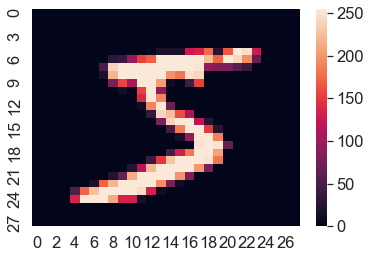

In [4]:
sns.heatmap(x_train[0])

As can be seen, each input sample is a 28x28 picture, with each pixel a grayscale value from 0-255. 

We will perform the following preprocessing:
  * Flatten the input into a data matrix [num_samples, 28, 28] $\rightarrow$ [num_samples, 784]
  * Rescale the pixel values from [0,255] to [0,1]

In [56]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [57]:
print(x_train[1].shape) # flattened image as vector

(784,)


Next, let us look at the format of the labels

In [58]:
print(y_train) # labels (i.e. ground truth)

[5 0 4 ... 5 6 8]


The labels are the actual numerical values. But for this classification problem we should not use the ordinal data as is. Instead, we convert them into a one-hot encoding, e.g.
$$
    5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] \\
    3 \rightarrow [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
$$

This can be done calling `tf.keras.utils.to_categorical` on the inputs.

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
y_train.shape

(60000, 10)

# Building a simple neural network

Here we will build and train a simple neural network for this classification problem.

We will use the `Sequential` model API. A *model* in keras represents a high level abstraction of a neural network. It consists of a collection of *layers*, and training/evaluation and other common tasks are all handled at the model level.

The *sequential* model is a special type of models where it is a linear stack of layers, and will suffice for our current task. In future demos we will explore other types of models supported by `Keras`. For more information, you may check here: https://keras.io/models/about-keras-models/



In [10]:
from tensorflow.keras import Sequential

In [11]:
model = Sequential()

We want to build a simple 1-hidden-layer (shallow) neural network in the form of 
$$
    h = g(Wx + c) \\
    y = Vh + b
$$
We will use the ReLU activation
$$
    g(z) = \max(0, z)
$$
The number of hidden units is given by the first dimension of W (or the dimension of c) and the number of output units is 10, since we are considering a 10-class classification problem.

Both of these layers can be implemented by the `Dense` layer type from `tf.keras.layers`. We will first use a hidden dimension of 128.

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
model.add(Dense(units=128, activation='relu')) # hidden layer
model.add(Dense(units=10, activation='softmax')) # output layer

# Compiling and Training

Now, let us specify losses and optimizers using the `compile` method and train the neural network using the `fit` method.

Here, we will use the *cross-entropy* loss and the *SGD* optimizer, which stands for stochastic gradient descent. We have only introduced the usual gradient descent in class, but we will discuss its extension to the stochastic case to handle large datasets in a later lecture. By setting `batch_size` to be equal to the size of the training set, SGD is equivalent to GD.

In the `compile` method, we can also specify additional quantities to monitor during training, in addition to the loss. Recall that we are using the cross-entropy loss as a surrogate of the accuracy (0-1 loss), so let us monitor the accuracy also.

In [14]:
from tensorflow.keras.optimizers import SGD

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

We are now ready to train the model.

We are going to use the inefficient GD, which requires batch_size to be set to the total number of samples. To make training faster, we are going to only use the first 5000 data points for faster training.

Here `epochs` refers to the number of sweeps through our training set. Since we are doing GD, each iteration is one sweep, and hence one epoch. 

In [16]:
# x_train = x_train[:5000]
# y_train = y_train[:5000]

In [17]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=x_train.shape[0],
                    validation_data=(x_test, y_test))

Epoch 1/200


2023-02-02 13:53:20.224185: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 797ms/step - loss: 2.3438 - accuracy: 0.1253 - val_loss: 2.0929 - val_accuracy: 0.3109
Epoch 2/200
1/1 [==============================] - 0s 149ms/step - loss: 2.0934 - accuracy: 0.3144 - val_loss: 1.9110 - val_accuracy: 0.4870
Epoch 3/200
1/1 [==============================] - 0s 141ms/step - loss: 1.9160 - accuracy: 0.4810 - val_loss: 1.7381 - val_accuracy: 0.6106
Epoch 4/200
1/1 [==============================] - 0s 143ms/step - loss: 1.7464 - accuracy: 0.6033 - val_loss: 1.5755 - val_accuracy: 0.6787
Epoch 5/200
1/1 [==============================] - 0s 144ms/step - loss: 1.5867 - accuracy: 0.6717 - val_loss: 1.4277 - val_accuracy: 0.7206
Epoch 6/200
1/1 [==============================] - 0s 153ms/step - loss: 1.4412 - accuracy: 0.7148 - val_loss: 1.2971 - val_accuracy: 0.7499
Epoch 7/200
1/1 [==============================] - 0s 142ms/step - loss: 1.3125 - accuracy: 0.7423 - val_loss: 1.1843 - val_accuracy: 0.7670
Epoch 8/200
1/1 [========

Epoch 59/200
1/1 [==============================] - 0s 293ms/step - loss: 0.4040 - accuracy: 0.8917 - val_loss: 0.3829 - val_accuracy: 0.8986
Epoch 60/200
1/1 [==============================] - 0s 285ms/step - loss: 0.4016 - accuracy: 0.8924 - val_loss: 0.3806 - val_accuracy: 0.8990
Epoch 61/200
1/1 [==============================] - 0s 339ms/step - loss: 0.3994 - accuracy: 0.8926 - val_loss: 0.3786 - val_accuracy: 0.8990
Epoch 62/200
1/1 [==============================] - 0s 265ms/step - loss: 0.3972 - accuracy: 0.8932 - val_loss: 0.3765 - val_accuracy: 0.8995
Epoch 63/200
1/1 [==============================] - 0s 336ms/step - loss: 0.3950 - accuracy: 0.8935 - val_loss: 0.3745 - val_accuracy: 0.8997
Epoch 64/200
1/1 [==============================] - 0s 253ms/step - loss: 0.3930 - accuracy: 0.8942 - val_loss: 0.3726 - val_accuracy: 0.9002
Epoch 65/200
1/1 [==============================] - 0s 325ms/step - loss: 0.3909 - accuracy: 0.8946 - val_loss: 0.3707 - val_accuracy: 0.9004
Epoch 

1/1 [==============================] - 0s 282ms/step - loss: 0.3276 - accuracy: 0.9089 - val_loss: 0.3125 - val_accuracy: 0.9153
Epoch 117/200
1/1 [==============================] - 0s 306ms/step - loss: 0.3268 - accuracy: 0.9092 - val_loss: 0.3118 - val_accuracy: 0.9158
Epoch 118/200
1/1 [==============================] - 0s 260ms/step - loss: 0.3260 - accuracy: 0.9095 - val_loss: 0.3111 - val_accuracy: 0.9161
Epoch 119/200
1/1 [==============================] - 0s 332ms/step - loss: 0.3252 - accuracy: 0.9097 - val_loss: 0.3103 - val_accuracy: 0.9166
Epoch 120/200
1/1 [==============================] - 0s 286ms/step - loss: 0.3244 - accuracy: 0.9099 - val_loss: 0.3096 - val_accuracy: 0.9167
Epoch 121/200
1/1 [==============================] - 0s 348ms/step - loss: 0.3237 - accuracy: 0.9101 - val_loss: 0.3089 - val_accuracy: 0.9170
Epoch 122/200
1/1 [==============================] - 0s 267ms/step - loss: 0.3229 - accuracy: 0.9103 - val_loss: 0.3082 - val_accuracy: 0.9171
Epoch 123/200

1/1 [==============================] - 0s 258ms/step - loss: 0.2913 - accuracy: 0.9187 - val_loss: 0.2798 - val_accuracy: 0.9244
Epoch 174/200
1/1 [==============================] - 0s 335ms/step - loss: 0.2908 - accuracy: 0.9188 - val_loss: 0.2794 - val_accuracy: 0.9244
Epoch 175/200
1/1 [==============================] - 0s 333ms/step - loss: 0.2903 - accuracy: 0.9190 - val_loss: 0.2789 - val_accuracy: 0.9244
Epoch 176/200
1/1 [==============================] - 0s 303ms/step - loss: 0.2898 - accuracy: 0.9190 - val_loss: 0.2785 - val_accuracy: 0.9245
Epoch 177/200
1/1 [==============================] - 0s 329ms/step - loss: 0.2893 - accuracy: 0.9192 - val_loss: 0.2780 - val_accuracy: 0.9248
Epoch 178/200
1/1 [==============================] - 0s 290ms/step - loss: 0.2888 - accuracy: 0.9193 - val_loss: 0.2776 - val_accuracy: 0.9248
Epoch 179/200
1/1 [==============================] - 0s 307ms/step - loss: 0.2883 - accuracy: 0.9194 - val_loss: 0.2771 - val_accuracy: 0.9248
Epoch 180/200

Let us examine the training curves to see how we are doing.

In [18]:
import pandas as pd

In [19]:
history = pd.DataFrame(history.history)

In [20]:
history

,loss,accuracy,val_loss,val_accuracy
0,2.343760,0.125283,2.092929,0.3109
1,2.093353,0.314433,1.911020,0.4870
2,1.915978,0.481033,1.738136,0.6106
3,1.746391,0.603317,1.575509,0.6787
4,1.586657,0.671717,1.427668,0.7206
...,...,...,...,...
195,0.280312,0.921500,0.270001,0.9259
196,0.279865,0.921683,0.269604,0.9258
197,0.279420,0.921783,0.269207,0.9259
198,0.278977,0.922067,0.268813,0.9260


<AxesSubplot: title={'center': 'Accuracy'}>

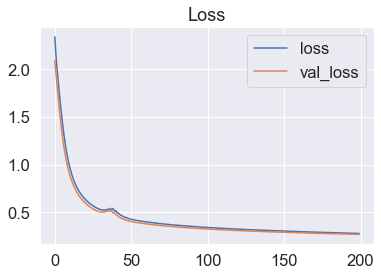

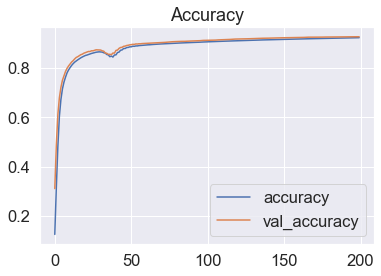

In [21]:
history.plot(y=['loss', 'val_loss'], title='Loss')
history.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

# Evaluation of our Model

Since we are faced with a classification problem, there is more than just accuracy we care about.

## Classification Report

This is a handy function from the `sklearn` library. It outputs the 1 vs all precision, recall, f1-score and support for each class. This is most useful when you have unbalanced datasets (not the case here). 

In [22]:
from sklearn.metrics import classification_report

In [23]:
y_test_predict = model.predict(x_test)

313/313 [==============================] - 0s 420us/step


In [24]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.94      0.92       982
           5       0.92      0.87      0.90       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## Confusion Matrix

We can also look at the so-called *confusion matrix*, which is a matrix whose $i,j$ entry represents the number of samples  belong to class $i$ that was classified as class $j$.

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cmatrix = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1))

In [27]:
print(cmatrix)

[[ 962    0    3    3    0    3    5    1    3    0]
 [   0 1110    2    2    1    1    4    2   13    0]
 [   9    3  925   16   17    0   12   13   32    5]
 [   3    0   18  926    1   24    2   12   17    7]
 [   1    3    3    1  920    0   11    2    6   35]
 [  10    3    6   37   10  777   16    3   23    7]
 [  13    3    3    1   11   12  911    1    3    0]
 [   3    9   26    4    9    0    0  951    3   23]
 [   8    4    8   23    8   19   13    8  870   13]
 [  10    8    2   12   39    7    1   16    6  908]]


Let us use `sns.heatmap` to visualize the confusion matrix

<AxesSubplot: >

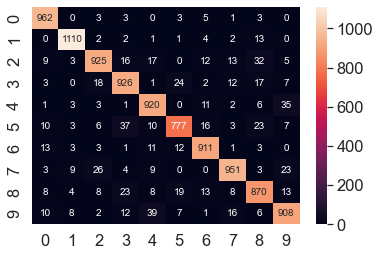

In [28]:
sns.heatmap(cmatrix, annot=True, fmt="d")

We can also get rid of the diagonal values (representing the correctly classified samples) for a clearer view of the main confusion

<AxesSubplot: >

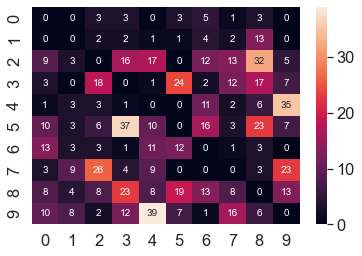

In [29]:
np.fill_diagonal(cmatrix, 0)
sns.heatmap(cmatrix, annot=True, fmt="d")